# EDA: Exploratory Data Analysis

## Analisis inicial:

1.- Carga de los datos

2.- Inspeccion inicial: calidad de datos pre EDA -> info(), isnull(), duplicated(), describe(), dtypes como algunos ejemplos.

3.- Identificacion de los problemas

### 1.- Carga de los datos

In [ ]:
import kagglehub
import pandas as pd
import os

# Descargar y cargar el dataset
path = kagglehub.dataset_download("gregorut/videogamesales")
df = pd.read_csv(os.path.join(path, 'vgsales.csv'))

### 2.- Inspeccion inicial

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


## EDA: Tecnicas claves

1.- Analisis Univariado: histogramas, boxplots, media, mediana y moda

2.- Analisis Bivariado: scatter plots, correlacion de Pearson y crosstab

3.- Analisis Multivariado: matrices de correlacion, pair plots y regresion multiple

4.- Visualizaciones: histogramas, dispersion, barras, mapas de calor

### Analisis univariado

In [ ]:
print('Media: ', df['NA_Sales'].mean())
print('Mediana: ', df['NA_Sales'].median())
print('Desviacion estandar: ', df['NA_Sales'].std())
print('Moda: ',df['NA_Sales'].mode())

Media:  0.26466742981082064
Mediana:  0.08
Desviacion estandar:  0.8166830292990428
Moda:  0    0.0
Name: NA_Sales, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

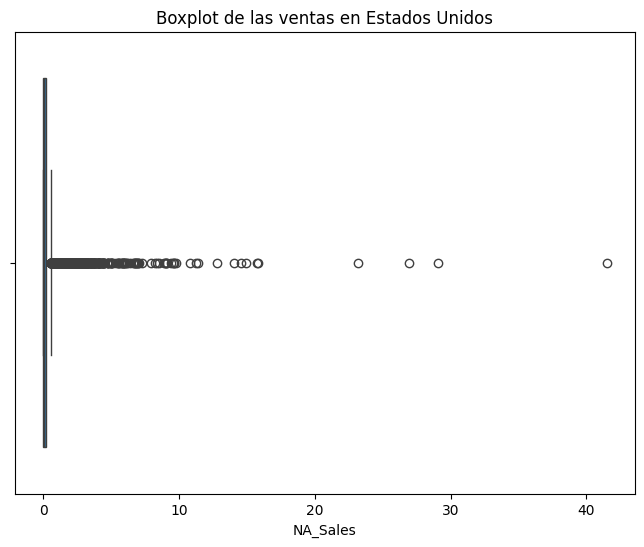

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['NA_Sales'])
plt.title('Boxplot de las ventas en Estados Unidos')
plt.show()

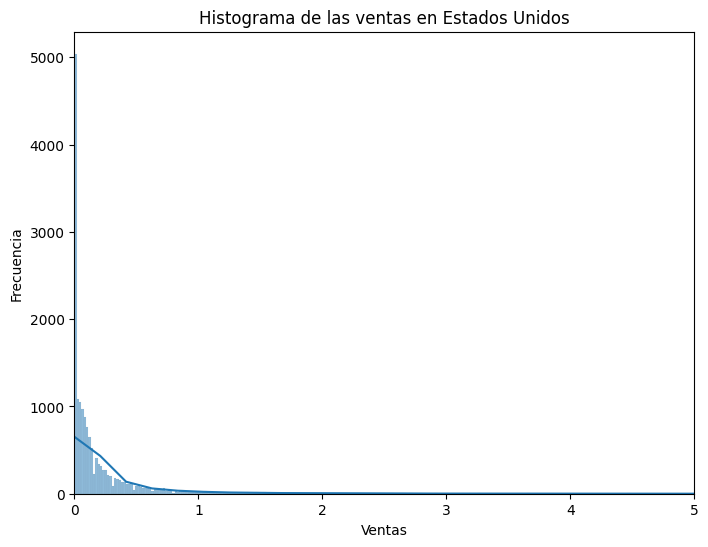

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(x = df['NA_Sales'], bins = 'auto', kde = True)
plt.title('Histograma de las ventas en Estados Unidos')
plt.xlim(0, 5)
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

#### Ejercicio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {'ID': range(1, 1000),
      'Producto': np.random.choice(['Camiseta', 'Pantalon', 'Zapatos', 'Gorra', 'Calcetines'], 999),
      'Precio': np.round(np.random.uniform(10, 100, 999), 2),
      'Ventas': np.random.randint(1, 80, 999),
      'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 999),
      'Descuento': np.random.choice([True, False], 999),
      'Clasificacion_cliente': np.random.randint(1, 6, 999)}
df = pd.DataFrame(data)
df

,ID,Producto,Precio,Ventas,Region,Descuento,Clasificacion_cliente
0,1,Gorra,82.66,52,Norte,True,5
1,2,Zapatos,74.42,78,Oeste,True,1
2,3,Zapatos,20.37,78,Norte,True,3
3,4,Gorra,12.68,18,Oeste,True,4
4,5,Pantalon,27.97,44,Este,False,1
...,...,...,...,...,...,...,...
994,995,Pantalon,11.82,33,Sur,True,3
995,996,Pantalon,17.33,25,Este,False,3
996,997,Gorra,15.06,42,Norte,False,1
997,998,Pantalon,51.43,42,Norte,False,3


In [ ]:
df.loc[3, 'Precio'] = np.nan
df.loc[10, 'Ventas'] = np.nan
df.loc[15, 'Region'] = np.nan
df.head(5)

,ID,Producto,Precio,Ventas,Region,Descuento,Clasificacion_cliente
0,1,Zapatos,17.85,18.0,Sur,False,5
1,2,Pantalon,30.17,45.0,Norte,False,5
2,3,Camiseta,19.51,13.0,Sur,False,4
3,4,Calcetines,NaN,20.0,Norte,True,3
4,5,Gorra,56.65,28.0,Oeste,False,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20 non-null     int64  
 1   Producto               20 non-null     object 
 2   Precio                 19 non-null     float64
 3   Ventas                 19 non-null     float64
 4   Region                 19 non-null     object 
 5   Descuento              20 non-null     bool   
 6   Clasificacion_cliente  20 non-null     int64  
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 1.1+ KB


In [ ]:
df.describe()

,ID,Precio,Ventas,Clasificacion_cliente
count,20.00000,19.000000,19.000000,20.000000
mean,10.50000,48.848421,26.210526,2.450000
std,5.91608,25.078903,14.558613,1.394538
min,1.00000,15.120000,2.000000,1.000000
25%,5.75000,23.800000,12.000000,1.000000
50%,10.50000,54.920000,31.000000,2.000000
75%,15.25000,67.035000,39.500000,3.250000
max,20.00000,95.350000,42.000000,5.000000


In [ ]:
temp = df.drop(columns = ['ID'])
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Precio,19.0,48.848421,25.078903,15.12,23.8,54.92,67.035,95.35
Ventas,19.0,26.210526,14.558613,2.00,12.0,31.00,39.500,42.00
Clasificacion_cliente,20.0,2.450000,1.394538,1.00,1.0,2.00,3.250,5.00


In [ ]:
df.isnull().sum()

,0
ID,0
Producto,0
Precio,1
Ventas,1
Region,1
Descuento,0
Clasificacion_cliente,0


In [ ]:
df2 = df.dropna()
df2

,ID,Producto,Precio,Ventas,Region,Descuento,Clasificacion_cliente
0,1,Camiseta,15.43,36.0,Este,True,2
1,2,Calcetines,71.86,23.0,Sur,True,5
2,3,Zapatos,77.95,28.0,Oeste,False,3
4,5,Gorra,79.59,8.0,Sur,True,2
5,6,Gorra,58.64,40.0,Oeste,False,3
6,7,Calcetines,23.14,42.0,Este,False,4
7,8,Camiseta,95.35,39.0,Este,False,2
8,9,Calcetines,68.54,7.0,Norte,False,1
9,10,Zapatos,15.12,31.0,Sur,False,1
11,12,Gorra,22.75,25.0,Oeste,False,3


In [ ]:
df['Precio'].median()

54.92

In [ ]:
df['Precio'].fillna(df['Precio'].mean())
df['Ventas'].fillna(df['Ventas'].mean())
df['Region'].fillna(df['Region'].mode)

,Region
0,Sur
1,Sur
2,Sur
3,Norte
4,Norte
5,Oeste
6,Sur
7,Norte
8,Norte
9,Oeste


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20 non-null     int64  
 1   Producto               20 non-null     object 
 2   Precio                 20 non-null     float64
 3   Ventas                 20 non-null     int64  
 4   Region                 20 non-null     object 
 5   Descuento              20 non-null     bool   
 6   Clasificacion_cliente  20 non-null     int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 1.1+ KB


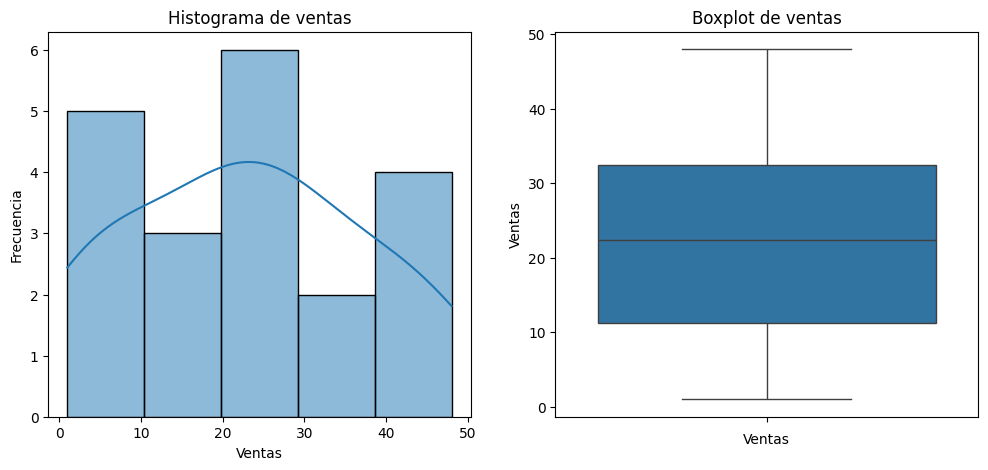

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Ventas'], bins = 5, kde = True)
plt.title('Histograma de ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.boxplot(y = df['Ventas'])
plt.title('Boxplot de ventas')
plt.xlabel('Ventas')
plt.show()

In [ ]:
df_num = df.select_dtypes(include = np.number)
corr = df_num.corr()
corr

,ID,Precio,Ventas,Clasificacion_cliente
ID,1.000000,0.481656,-0.194082,-0.319621
Precio,0.481656,1.000000,0.332994,-0.252611
Ventas,-0.194082,0.332994,1.000000,-0.126573
Clasificacion_cliente,-0.319621,-0.252611,-0.126573,1.000000


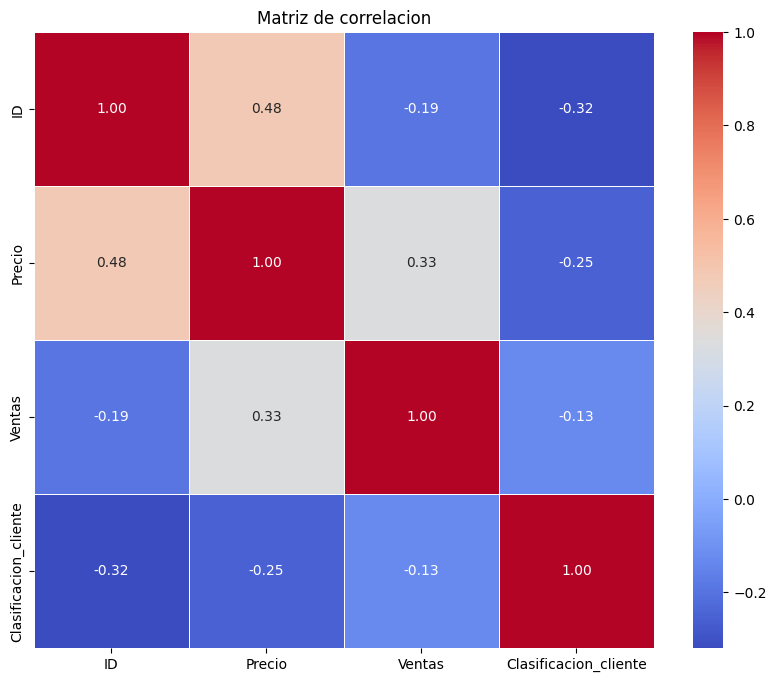

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = .5)
plt.title('Matriz de correlacion')
plt.show()

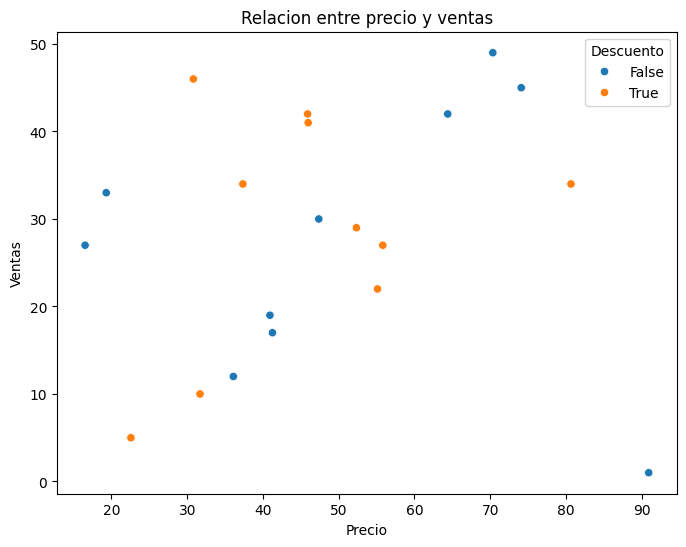

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['Precio'], y = df['Ventas'], data = df, hue = 'Descuento')
plt.title('Relacion entre precio y ventas')
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.show()

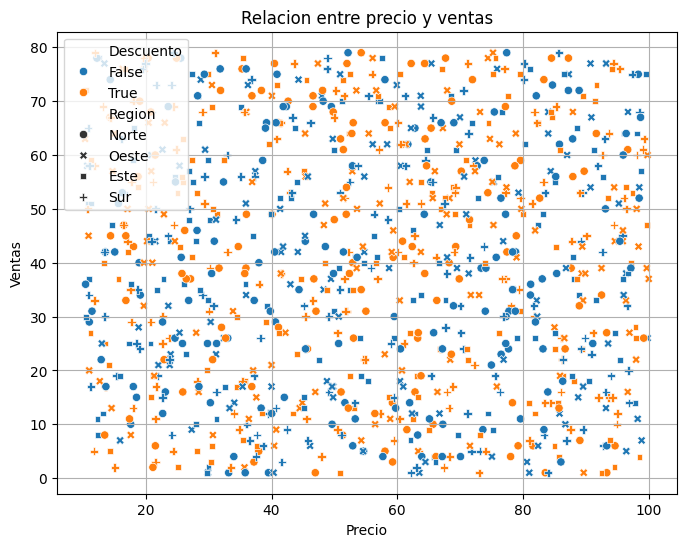

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['Precio'], y = df['Ventas'], data = df, hue = 'Descuento', style = 'Region')
plt.title('Relacion entre precio y ventas')
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

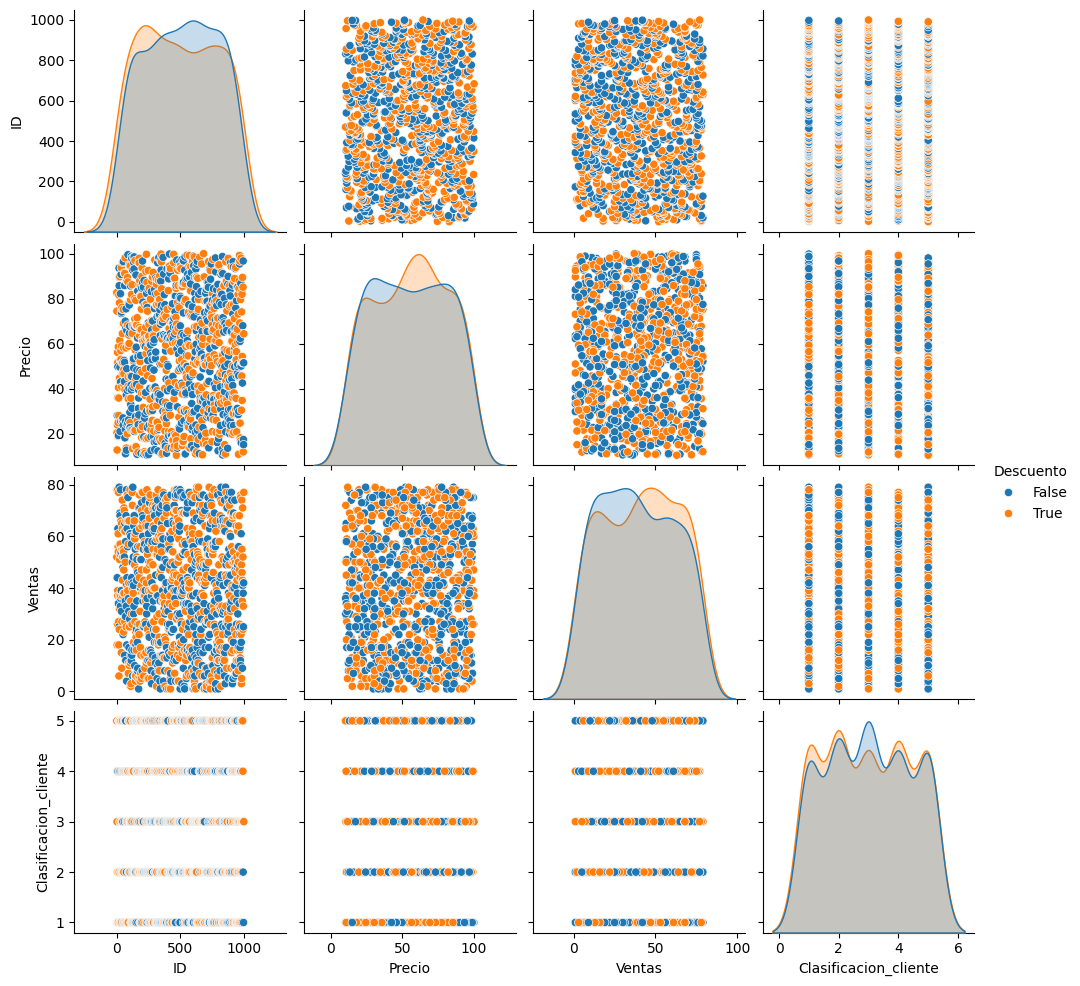

In [ ]:
plt.figure(figsize = (8, 6))
sns.pairplot(df, hue = 'Descuento')
plt.show()

### Analisis Estadistico

#### Medidas estadisticas

In [3]:
import statistics as stats

datos = [1, 1, 1, 2, 3, 4, 4, 5, 5, 5, 5]
print('Media: ', stats.mean(datos))
print('Mediana: ', stats.median(datos))
print('Moda: ', stats.mode(datos))

Media:  3.272727272727273
Mediana:  4
Moda:  5


#### Medidas de dispersion

In [6]:
import numpy as np

datos = [10, 12, 15, 13, 11]

varianza_pobla = np.var(datos)
print('La varianza es: ', varianza_pobla)

varianza_muestra = np.var(datos, ddof = 1) #con correcion de Bessel -> por el ddof
print('La varianza muestra es: ', varianza_muestra)

desv_pobla = np.std(datos)
print('La desviacion estandar es: ', desv_pobla)

desv_muestra = np.std(datos, ddof = 1)
print('La desviacion estandar muestra es: ', desv_muestra)

La varianza es:  2.96
La varianza muestra es:  3.7
La desviacion estandar es:  1.7204650534085253
La desviacion estandar muestra es:  1.9235384061671346


In [7]:
poblacion = np.array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
muestra = np.random.choice(poblacion, size = 5, replace = False)
print('Poblacion: ', poblacion)
print('Muestra: ', muestra)

Poblacion:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Muestra:  [19 21 20 18 25]


#### Percentiles

In [14]:
datos = np.array([10, 12, 15, 18, 20, 22, 25, 28, 30, 32])

print('Quartiles: \n')
q1 = np.quantile(datos, 0.25)
q2 = np.quantile(datos, 0.5)
q3 = np.quantile(datos, 0.75)
print('Primer cuartil: ', q1)
print('Segundo cuartil: ', q2)
print('Tercer cuartil: ', q3)

print('\nQuintil: \n')
q5 = np.quantile(datos, 0.20)
print(q5)

print('\nDecil 7: \n')
q7 = np.quantile(datos, 0.70)
print(q7)

print('\nPercentil 99: \n')
q99 = np.quantile(datos, 0.99)
print(q99)


Quartiles: 

Primer cuartil:  15.75
Segundo cuartil:  21.0
Tercer cuartil:  27.25

Quintil: 

14.4

Decil 7: 

25.9

Percentil 99: 

31.82


#### Ejercicio

##### 1. Importar librerias

In [19]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Crear el dataset

In [54]:
edades = np.array([18, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 24, 24, 25, 26, 27, 80])
df = pd.DataFrame(edades, columns = ['Edad'])
df.head()

,Edad
0,18
1,19
2,19
3,20
4,20


##### 3. Tabla de frecuencia

In [32]:
tabla_frecuencia = df['Edad'].value_counts().sort_index().to_frame('Frecuencia absoluta')
tabla_frecuencia['Frecuencia relativa'] = tabla_frecuencia['Frecuencia absoluta'] / tabla_frecuencia['Frecuencia absoluta'].sum()
tabla_frecuencia['Frecuencia acumulada'] = tabla_frecuencia['Frecuencia absoluta'].cumsum()
tabla_frecuencia['Frecuencia relativa acumulada'] = tabla_frecuencia['Frecuencia relativa'].cumsum()
tabla_frecuencia

,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada,Frecuencia relativa acumulada
Edad,,,,
18,1,0.05,1,0.05
19,2,0.10,3,0.15
20,3,0.15,6,0.30
21,3,0.15,9,0.45
22,3,0.15,12,0.60
23,2,0.10,14,0.70
24,2,0.10,16,0.80
25,1,0.05,17,0.85
26,1,0.05,18,0.90


##### 4. Medidas estadisticas

In [34]:
print('Media: ', df['Edad'].mean())
print('Mediana: ', df['Edad'].median())
print('Moda: ', df['Edad'].mode())

Media:  24.85
Mediana:  22.0
Moda:  0    20
1    21
2    22
Name: Edad, dtype: int64


##### 5. Medidas de dispersion

In [42]:
rango = df['Edad'].max() - df['Edad'].min()
print('Rango de la edad: ',rango)
var_muestra = df['Edad'].var(ddof = 1)
print(f'Varianza de la edad: {var_muestra:.2f}')
desv_muestra = df['Edad'].std(ddof = 1)
print(f'Desviacion estandar de la edad: {desv_muestra:.2f}')

Rango de la edad:  62
Varianza de la edad: 174.24
Desviacion estandar de la edad: 13.20


##### 6. Percentiles

In [55]:
q1 = np.percentile(df['Edad'], 25)
q2 = np.percentile(df['Edad'], 50)
q3 = np.percentile(df['Edad'], 75)
print('Primer cuartil: ', q1)
print('Segundo cuartil: ', q2)
print('Tercer cuartil: ', q3)

Primer cuartil:  20.0
Segundo cuartil:  22.0
Tercer cuartil:  24.0


##### 7. Outliers

In [56]:
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_supp = q3 + 1.5 * iqr
print(f'Limite superior {lim_supp:.2f}')
print(f'Limite inferior {lim_inf:.2f}')
outliers = df[(df['Edad'] < lim_inf) | (df['Edad'] > lim_supp)]
outliers

Limite superior 30.00
Limite inferior 14.00


,Edad
19,80


In [57]:
df_limpio = df.drop(outliers.index, inplace = True)

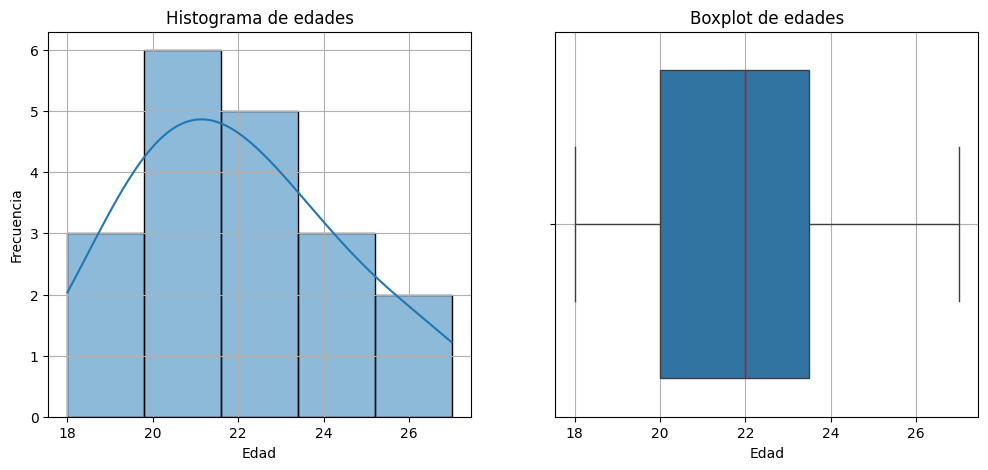

In [67]:
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)

sns.histplot(x = df['Edad'], bins = 5, edgecolor = 'black', kde = True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Histograma de edades')

plt.subplot(1, 2, 2)

sns.boxplot(x = df['Edad'], patch_artist = True, medianprops = {'color': 'red'})
plt.xlabel('Edad')
plt.grid(True)
plt.title('Boxplot de edades')

plt.show()